In [1]:
from ripser import ripser
from persim import plot_diagrams
from numpy import sin,cos, dot
import numpy as np
from numpy import pi,cos,sin
import matplotlib.pyplot as plt
import random

In [2]:
 def graph_continuous(image_function, x, y, x_random = True, n_samples= 100000, y_random = True):
    
    if x_random == True:
        X = list(2 * x * np.random.random(n_samples) - x) 
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)      

    if x_random == False:
        X = np.linspace(-x,x,n_samples)
        if y_random == True:
            Y = list(2 * y * np.random.random(n_samples) - y) 
        else:
            Y = np.linspace(-y,y,n_samples)   

    x_points = []
    y_points = []
    colors = []
    for i in range(n_samples):
        color = image_function(X[i],Y[i]) 
        colors.append(color)
        x_points.append(X[i])
        y_points.append(Y[i])

        
    fig = plt.figure(figsize = (4, 4))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors, s = .1)
    plt.show()
    
    
def view_window_continuous(image_function, num_pixels, window_size):
    
    pixels = get_pixels(num_pixels, window_size)
            
    x_points = []
    y_points = []
    colors = []
    for i in range(len(pixels)):
        color = image_function(pixels[i][0],pixels[i][1]) 
        colors.append(color)
        x_points.append(pixels[i][0])
        y_points.append(pixels[i][1])
    
    fig = plt.figure(figsize = (4, 4))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()
    
def view_isom(a, b, theta , image_function, num_pixels, window_size):
    
    pixels = get_pixels(num_pixels, window_size)
    
    iso_inv = isom(-1 * a,-1 * b,2 * pi - theta)
    
    pixels_inv = []
    for pixel in pixels: 
        pixels_inv.append(iso_inv(pixel[0], pixel[1]))
    
    x_points = []
    y_points = []
    colors = []
    for i in range(len(pixels_inv)):
        color = image_function(pixels_inv[i][0],pixels_inv[i][1]) 
        colors.append(color)
        x_points.append(pixels[i][0])
        y_points.append(pixels[i][1])  

    fig = plt.figure(figsize = (4, 4))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()

    
def get_pixels(num_pixels, window_size):
    sample = list(np.linspace(-window_size/2, window_size/2, num_pixels))
    pixels = []
    for i in range(len(sample)):
        for j in range(len(sample)):
            pixels.append((sample[i],sample[j]))     
    return pixels


def get_colors(pixels, image_function):
    colors = []
    for pixel in pixels:
        colors.append(image_function(pixel[0],pixel[1]))
    return colors  

def translation(a,b):
    def t_ab(x,y): 
        return x+a, y+b
    return t_ab

def rotation(theta):
    def r_theta(x,y):
        return x * cos(theta) - y * sin(theta), x * sin(theta) + y * cos(theta)
    return r_theta

def isom(a,b,theta):
    def iso(x,y):
        r = rotation(theta)
        t = translation(a,b)
        return t(r(x,y)[0], r(x,y)[1])
    return iso

def generate_isom(n_isos, x_translate, y_translate):
    a = list(2 * x_translate * np.random.random(n_isos) - x_translate) # sampling from (-x,x)
    b = list(2 * y_translate * np.random.random(n_isos) - y_translate) # sampling from (-y,y)
    theta = list(2 * pi * np.random.random(n_isos)) # sampling from (0, 2pi)

    isos = []
    isos_inv = []
    for i in range(n_isos):
        isos.append(isom(a[i], b[i], theta[i]))
        isos_inv.append(isom(-1 * a[i],-1 * b[i],2 * pi - theta[i])) 
    return isos_inv

def new_colors(pixels, iso_inv, image_function):
    pixels_inv = []
    for pixel in pixels: 
        pixels_inv.append(iso_inv(pixel[0], pixel[1]))
    new_colors = get_colors(pixels_inv, image_function)
    return new_colors

def matrix_of_images(pixels, isos_inv, image_function):
    vectors = []
    for i in isos_inv:
        vectors.append([new_colors(pixels, i, image_function)])
    M = np.concatenate(vectors, axis=0 )
    return M

def p_hom(M, maxdim, coeff):
    output = ripser(M, maxdim = maxdim, coeff = coeff)
    return output
    
def persistent_H1_intervals(output):
    H1 = output['dgms'][1].tolist() # all intervals in H1
    d = []
    for pair in H1: 
        d.append(pair[1] - pair[0]) # finding lengths of intervals in H1
    d.sort(reverse = True) # sorting from longest to shortest intervals
    d
    return d

def plot_dgms(output):
    dgms = output['dgms']
    fig = plt.figure(figsize = (12, 6))
    plot_diagrams(dgms)
    
def pipeline(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_pixels(num_pixels, window_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output

def generate_90_isom(n_isos, x_translate, y_translate):
    a = list(2 * x_translate * np.random.random(n_isos) - x_translate) # sampling from (-x,x)
    b = list(2 * y_translate * np.random.random(n_isos) - y_translate) # sampling from (-y,y)
    theta = list(pi/2 * np.ones(n_isos)) 

    isos = []
    isos_inv = []
    for i in range(n_isos):
        isos.append(isom(a[i], b[i], theta[i]))
        isos_inv.append(isom(-1 * a[i],-1 * b[i],2 * pi - theta[i])) 
    return isos_inv

def generate_180_isom(n_isos, x_translate, y_translate):
    a = list(2 * x_translate * np.random.random(n_isos) - x_translate) # sampling from (-x,x)
    b = list(2 * y_translate * np.random.random(n_isos) - y_translate) # sampling from (-y,y)
    theta = list(pi * np.ones(n_isos)) 

    isos = []
    isos_inv = []
    for i in range(n_isos):
        isos.append(isom(a[i], b[i], theta[i]))
        isos_inv.append(isom(-1 * a[i],-1 * b[i],2 * pi - theta[i])) 
    return isos_inv


def view_isom2(isom_inv, image_function, num_pixels, window_size):
    
    pixels = get_pixels(num_pixels, window_size)
    
    pixels_inv = []
    for pixel in pixels: 
        pixels_inv.append(isom_inv(pixel[0], pixel[1]))
    
    x_points = []
    y_points = []
    colors = []
    for i in range(len(pixels_inv)):
        color = image_function(pixels_inv[i][0],pixels_inv[i][1]) 
        colors.append(color)
        x_points.append(pixels[i][0])
        y_points.append(pixels[i][1])  

    fig = plt.figure(figsize = (4, 4))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()
    
def p3(x,y):
    X = 1/(2 * pi) * (x + y / (3**(1/2)))
    Y = 1/(2 * pi) * 2 * y / (3**(1/2))
    C = cos(X + Y) + cos(X - 2 * Y) + cos(-2 * X + Y)
    S = sin(X + Y) +sin(X - 2*Y) +sin(-2 * X + Y)
    return C + S

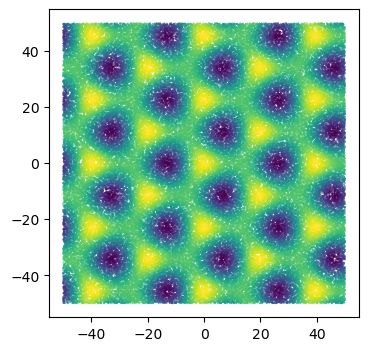

In [3]:
graph_continuous(image_function = p3, x = 50 , y = 50 , x_random = True, n_samples= 100000, y_random = True)

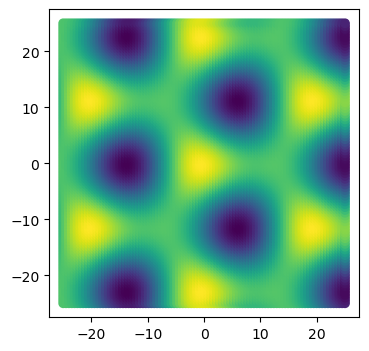

In [4]:
view_window_continuous(image_function = p3, num_pixels= 100, window_size = 50)

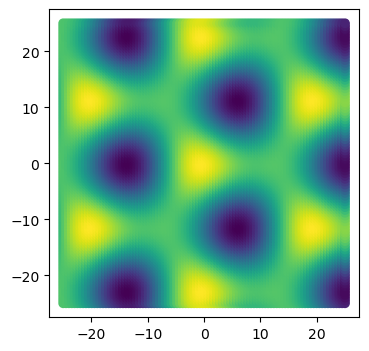

In [202]:
view_isom(a = 0, b = 0, theta=0, image_function = p3, num_pixels=100, window_size=50)

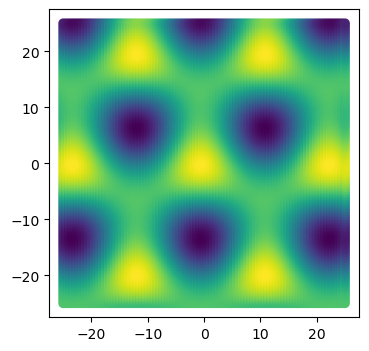

In [203]:
view_isom(a = 0, b = 0, theta=pi/2, image_function = p3, num_pixels=100, window_size=50)

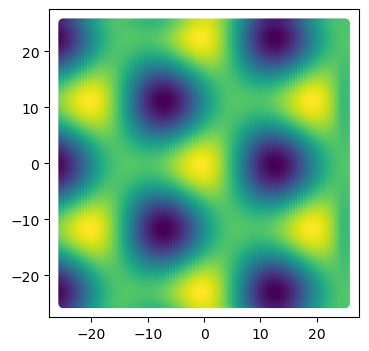

In [205]:
view_isom(a = 0, b = 0, theta=pi, image_function = p3, num_pixels=100, window_size=50)

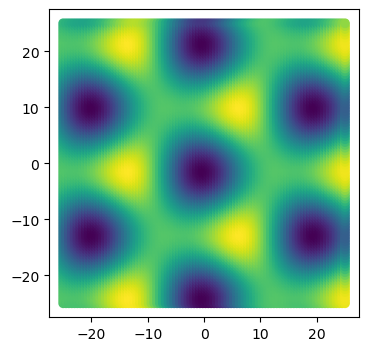

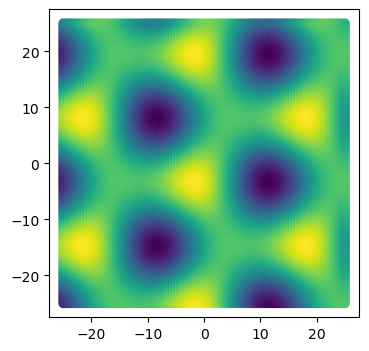

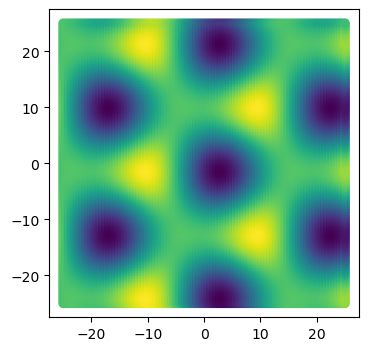

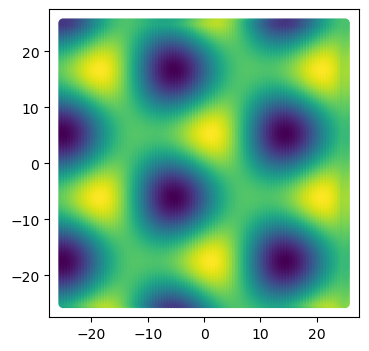

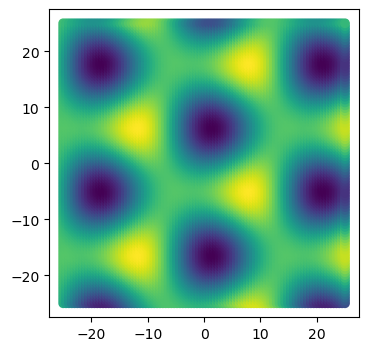

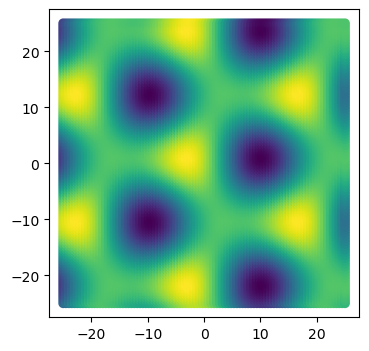

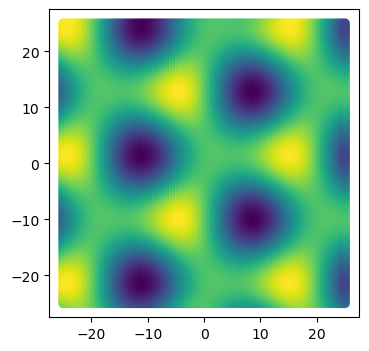

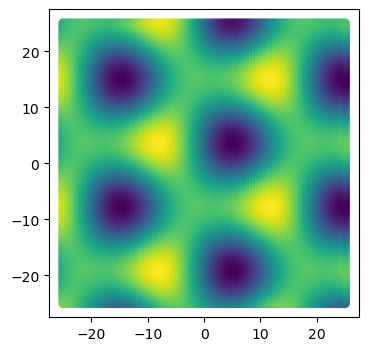

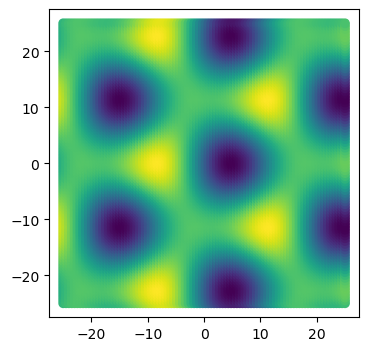

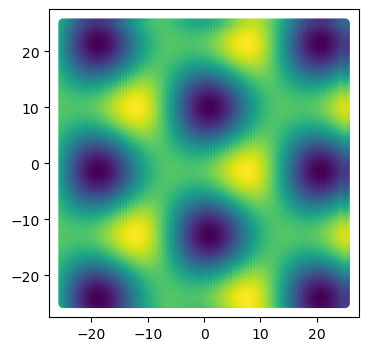

In [61]:
F = generate_180_isom(n_isos = 10, x_translate = 100, y_translate = 100)
for i in range(10):
    view_isom2(isom_inv = F[i], image_function = p3, num_pixels = 100, window_size = 50)

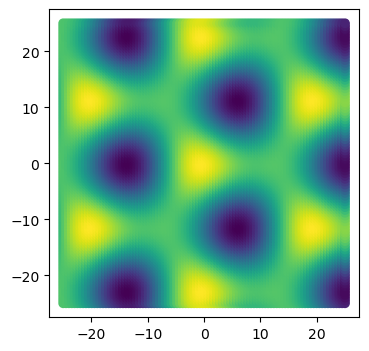

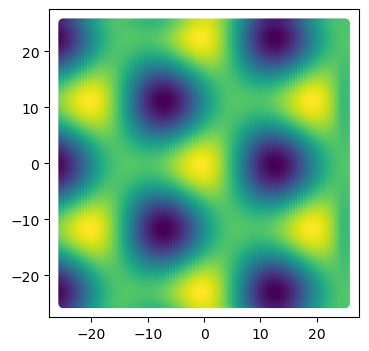

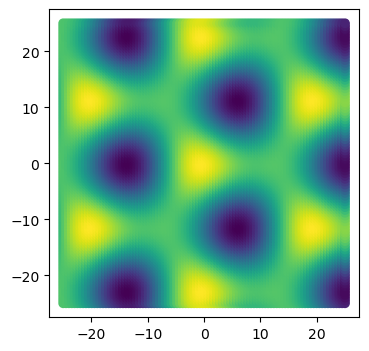

In [206]:
view_isom(a = 0, b = 0, theta=0, image_function = p3, num_pixels=100, window_size=50)
view_isom(a = 0, b = 0, theta=pi/3, image_function = p3, num_pixels=100, window_size=50)
view_isom(a = 0, b = 0, theta=2*pi/3, image_function = p3, num_pixels=100, window_size=50)

## Triangle lens

In [207]:
pixels = get_pixels(num_pixels = 100, window_size = 50)
pixels

[(-25.0, -25.0),
 (-25.0, -24.494949494949495),
 (-25.0, -23.98989898989899),
 (-25.0, -23.484848484848484),
 (-25.0, -22.97979797979798),
 (-25.0, -22.474747474747474),
 (-25.0, -21.96969696969697),
 (-25.0, -21.464646464646464),
 (-25.0, -20.95959595959596),
 (-25.0, -20.454545454545453),
 (-25.0, -19.949494949494948),
 (-25.0, -19.444444444444443),
 (-25.0, -18.939393939393938),
 (-25.0, -18.434343434343432),
 (-25.0, -17.929292929292927),
 (-25.0, -17.424242424242422),
 (-25.0, -16.919191919191917),
 (-25.0, -16.41414141414141),
 (-25.0, -15.909090909090908),
 (-25.0, -15.404040404040403),
 (-25.0, -14.898989898989898),
 (-25.0, -14.393939393939393),
 (-25.0, -13.888888888888888),
 (-25.0, -13.383838383838382),
 (-25.0, -12.878787878787879),
 (-25.0, -12.373737373737374),
 (-25.0, -11.868686868686869),
 (-25.0, -11.363636363636363),
 (-25.0, -10.858585858585858),
 (-25.0, -10.353535353535353),
 (-25.0, -9.848484848484848),
 (-25.0, -9.343434343434343),
 (-25.0, -8.838383838383837),

In [224]:
def get_triangular_pixels(num_pixels, window_size, y_int):
    sample = list(np.linspace(-window_size/2, window_size/2, num_pixels))
    pixels = []
    for i in range(len(sample)):
        for j in range(len(sample)):
            pixels.append((sample[i],sample[j]))
    tri_pixels = []
    for pixel in pixels:
        if (pixel[1] >= 1/(3**(0.5)) * pixel[0]) and (pixel[1] <= y_int - (1/(3**(0.5)) * pixel[0])) and pixel[0] >= 0:
            tri_pixels.append(pixel)
    return tri_pixels

In [226]:
pixels = get_triangular_pixels(100,50,22)
pixels

[(0.2525252525252526, 0.2525252525252526),
 (0.2525252525252526, 0.7575757575757578),
 (0.2525252525252526, 1.262626262626263),
 (0.2525252525252526, 1.7676767676767682),
 (0.2525252525252526, 2.2727272727272734),
 (0.2525252525252526, 2.7777777777777786),
 (0.2525252525252526, 3.2828282828282838),
 (0.2525252525252526, 3.787878787878789),
 (0.2525252525252526, 4.292929292929294),
 (0.2525252525252526, 4.797979797979799),
 (0.2525252525252526, 5.3030303030303045),
 (0.2525252525252526, 5.80808080808081),
 (0.2525252525252526, 6.313131313131315),
 (0.2525252525252526, 6.81818181818182),
 (0.2525252525252526, 7.323232323232325),
 (0.2525252525252526, 7.8282828282828305),
 (0.2525252525252526, 8.333333333333336),
 (0.2525252525252526, 8.838383838383841),
 (0.2525252525252526, 9.343434343434346),
 (0.2525252525252526, 9.848484848484851),
 (0.2525252525252526, 10.353535353535356),
 (0.2525252525252526, 10.858585858585862),
 (0.2525252525252526, 11.363636363636367),
 (0.2525252525252526, 11.

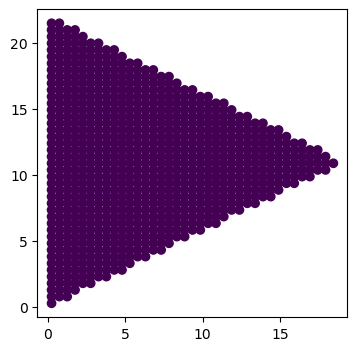

In [227]:
x_points = []
y_points = []
colors = []
for pixel in pixels:
    colors.append(1)
    x_points.append(pixel[0])
    y_points.append(pixel[1])

        
fig = plt.figure(figsize = (4, 4))
ax = plt.axes()
ax.scatter(x_points, y_points, c = colors)
plt.show()

In [228]:
def view_window_tri(image_function, num_pixels, window_size, y_int):
    
    pixels = get_triangular_pixels(num_pixels, window_size, y_int)
            
    x_points = []
    y_points = []
    colors = []
    for i in range(len(pixels)):
        color = image_function(pixels[i][0],pixels[i][1]) 
        colors.append(color)
        x_points.append(pixels[i][0])
        y_points.append(pixels[i][1])
    
    fig = plt.figure(figsize = (4, 4))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()

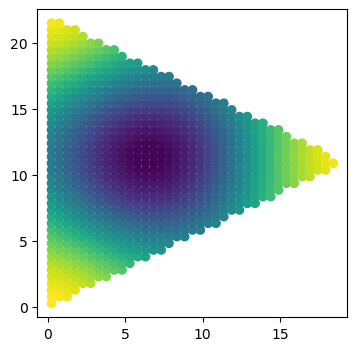

In [229]:
view_window_tri(p3, 100, 50,22)

In [230]:
def view_isom_tri(a, b, theta , image_function, num_pixels, window_size, y_int):
    
    pixels = get_triangular_pixels(num_pixels, window_size,y_int)
    
    iso_inv = isom(-1 * a,-1 * b,2 * pi - theta)
    
    pixels_inv = []
    for pixel in pixels: 
        pixels_inv.append(iso_inv(pixel[0], pixel[1]))
    
    x_points = []
    y_points = []
    colors = []
    for i in range(len(pixels_inv)):
        color = image_function(pixels_inv[i][0],pixels_inv[i][1]) 
        colors.append(color)
        x_points.append(pixels[i][0])
        y_points.append(pixels[i][1])  

    fig = plt.figure(figsize = (4, 4))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()

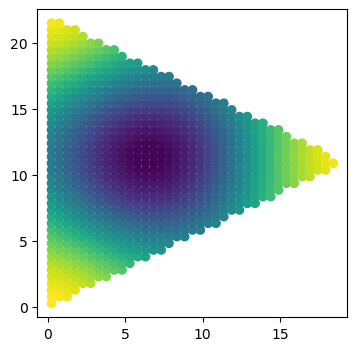

In [231]:
view_isom_tri(0,0,2*pi/3, image_function =p3, num_pixels = 100,window_size= 50, y_int = 22)

In [238]:
def pipeline_tri(image_function, num_pixels, window_size, y_int, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_triangular_pixels(num_pixels, window_size,y_int)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output

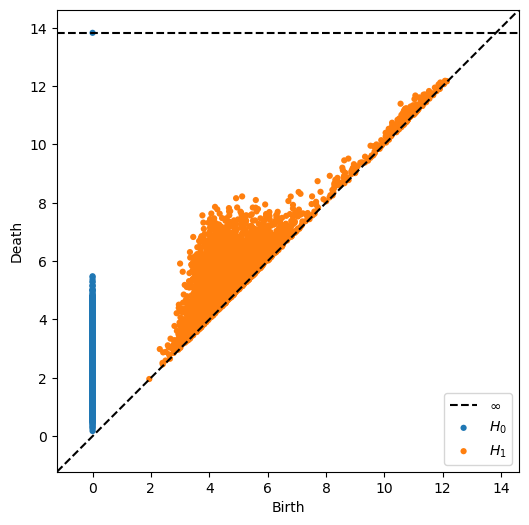

In [223]:
output = pipeline_tri(image_function=p3, num_pixels=40, window_size=50, y_int = 22, n_isos=5000, x_translate=100, y_translate=100, maxdim=1, coeff=2)
plot_dgms(output)

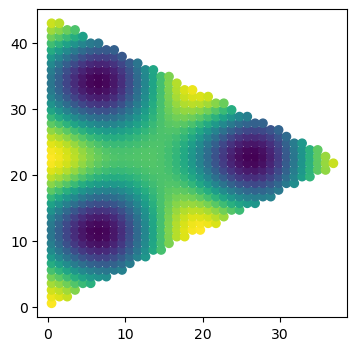

In [233]:
image_function, num_pixels, window_size, y_int
view_window_tri(p3, nume_pixels = 100, window_size= 100, y_int=44)

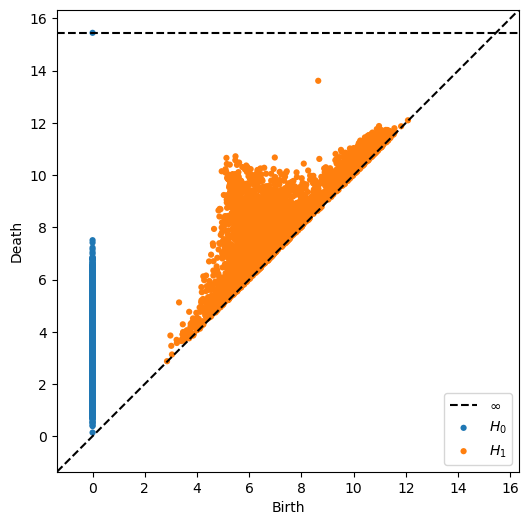

In [239]:
output = pipeline_tri(image_function=p3, num_pixels=40, window_size=100, y_int = 44, n_isos=5000, x_translate=1000, y_translate=1000, maxdim=1, coeff=2)
plot_dgms(output)

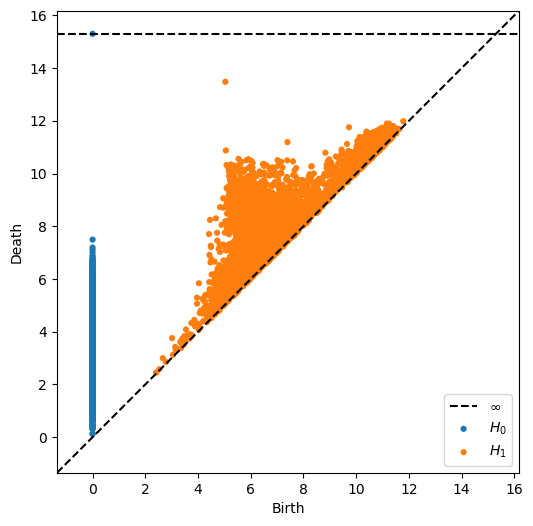

In [240]:
output = pipeline_tri(image_function=p3, num_pixels=40, window_size=100, y_int = 44, n_isos=5000, x_translate=1000, y_translate=1000, maxdim=1, coeff=3)
plot_dgms(output)

In [241]:
persistent_H1_intervals(output)

[8.445391178131104,
 5.821474552154541,
 5.239478588104248,
 5.109649658203125,
 5.096741676330566,
 5.071245193481445,
 5.037910461425781,
 5.031967639923096,
 5.028342247009277,
 5.023001194000244,
 4.986361503601074,
 4.984598636627197,
 4.941314697265625,
 4.92484712600708,
 4.923690319061279,
 4.897655963897705,
 4.8744707107543945,
 4.852715969085693,
 4.826552391052246,
 4.784291744232178,
 4.779511451721191,
 4.759639263153076,
 4.747276306152344,
 4.732002258300781,
 4.730275630950928,
 4.668541431427002,
 4.633274078369141,
 4.629827499389648,
 4.620606422424316,
 4.57767915725708,
 4.562422752380371,
 4.552359580993652,
 4.54974889755249,
 4.532306671142578,
 4.515213966369629,
 4.485052108764648,
 4.479926586151123,
 4.478550910949707,
 4.4528985023498535,
 4.451366901397705,
 4.446956157684326,
 4.431093215942383,
 4.416844367980957,
 4.38794469833374,
 4.366411209106445,
 4.363544940948486,
 4.362834930419922,
 4.3607401847839355,
 4.35582160949707,
 4.335984230041504,
 4

still getting results that correspond to C6

## Rhombic lens

In [5]:
def get_rhombic_pixels(num_pixels, window_size, y_int, x_trans):
    sample = list(np.linspace(-window_size/2, window_size/2, num_pixels))
    pixels = []
    for i in range(len(sample)):
        for j in range(len(sample)):
            pixels.append((sample[i],sample[j]))
    rhom_pixels = []
    for pixel in pixels:
        if (pixel[1] >= 1/(3**(0.5)) * (pixel[0]-x_trans)) and (pixel[1] >= -1/(3**(0.5)) * (pixel[0]-x_trans)) and (pixel[1] <= y_int - (1/(3**(0.5))) * (pixel[0]-x_trans)) and (pixel[1] <= y_int + (1/(3**(0.5)) * (pixel[0]-x_trans))):
            rhom_pixels.append(pixel)
    return rhom_pixels

In [6]:
pixels = get_rhombic_pixels(num_pixels = 100,window_size = 50,y_int=22, x_trans = 5)
pixels

[(-13.383838383838382, 10.858585858585862),
 (-13.383838383838382, 11.363636363636367),
 (-12.878787878787879, 10.353535353535356),
 (-12.878787878787879, 10.858585858585862),
 (-12.878787878787879, 11.363636363636367),
 (-12.373737373737374, 10.353535353535356),
 (-12.373737373737374, 10.858585858585862),
 (-12.373737373737374, 11.363636363636367),
 (-12.373737373737374, 11.868686868686872),
 (-11.868686868686869, 9.848484848484851),
 (-11.868686868686869, 10.353535353535356),
 (-11.868686868686869, 10.858585858585862),
 (-11.868686868686869, 11.363636363636367),
 (-11.868686868686869, 11.868686868686872),
 (-11.363636363636363, 9.848484848484851),
 (-11.363636363636363, 10.353535353535356),
 (-11.363636363636363, 10.858585858585862),
 (-11.363636363636363, 11.363636363636367),
 (-11.363636363636363, 11.868686868686872),
 (-11.363636363636363, 12.373737373737377),
 (-10.858585858585858, 9.343434343434346),
 (-10.858585858585858, 9.848484848484851),
 (-10.858585858585858, 10.3535353535

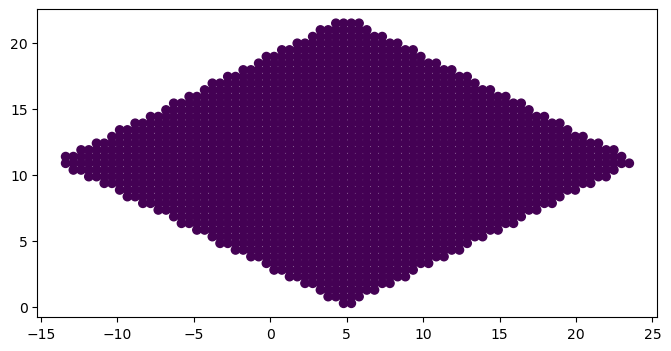

In [7]:
x_points = []
y_points = []
colors = []
for pixel in pixels:
    colors.append(1)
    x_points.append(pixel[0])
    y_points.append(pixel[1])

        
fig = plt.figure(figsize = (8, 4))
ax = plt.axes()
ax.scatter(x_points, y_points, c = colors)
plt.show()

In [8]:
def view_window_rhom(image_function, num_pixels, window_size, y_int, x_trans):
    
    pixels = get_rhombic_pixels(num_pixels, window_size, y_int,x_trans)
            
    x_points = []
    y_points = []
    colors = []
    for i in range(len(pixels)):
        color = image_function(pixels[i][0],pixels[i][1]) 
        colors.append(color)
        x_points.append(pixels[i][0])
        y_points.append(pixels[i][1])
    
    fig = plt.figure(figsize = (4, 4))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()
    
def view_isom_rhom(a, b, theta , image_function, num_pixels, window_size, y_int):
    
    pixels = get_rhombic_pixels(num_pixels, window_size,y_int)
    
    iso_inv = isom(-1 * a,-1 * b,2 * pi - theta)
    
    pixels_inv = []
    for pixel in pixels: 
        pixels_inv.append(iso_inv(pixel[0], pixel[1]))
    
    x_points = []
    y_points = []
    colors = []
    for i in range(len(pixels_inv)):
        color = image_function(pixels_inv[i][0],pixels_inv[i][1]) 
        colors.append(color)
        x_points.append(pixels[i][0])
        y_points.append(pixels[i][1])  

    fig = plt.figure(figsize = (4, 4))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()
    
def pipeline_rhom(image_function, num_pixels, window_size, y_int, x_trans, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_rhombic_pixels(num_pixels, window_size,y_int,x_trans)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output

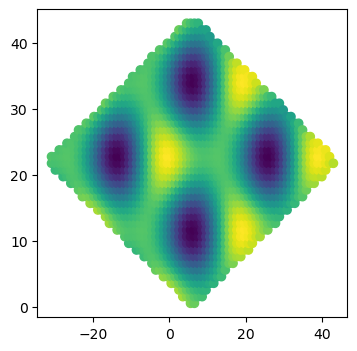

In [9]:
view_window_rhom(image_function=p3, num_pixels=100, window_size=100, y_int=44, x_trans = 6)

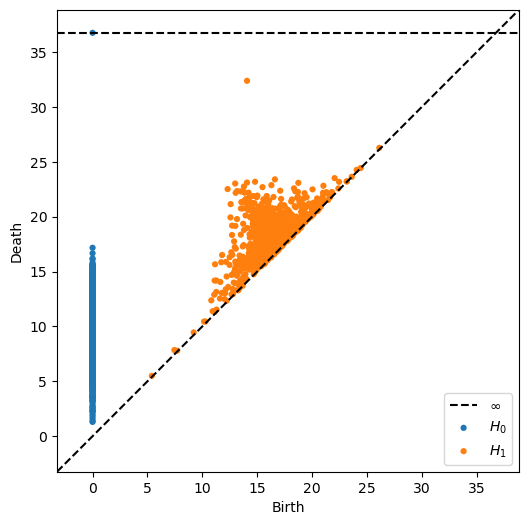

In [11]:
output = pipeline_rhom(image_function=p3, num_pixels=40, window_size=100, y_int=44, x_trans=6, n_isos=1000, x_translate=1000, y_translate=1000, maxdim=1, coeff=2)
plot_dgms(output)

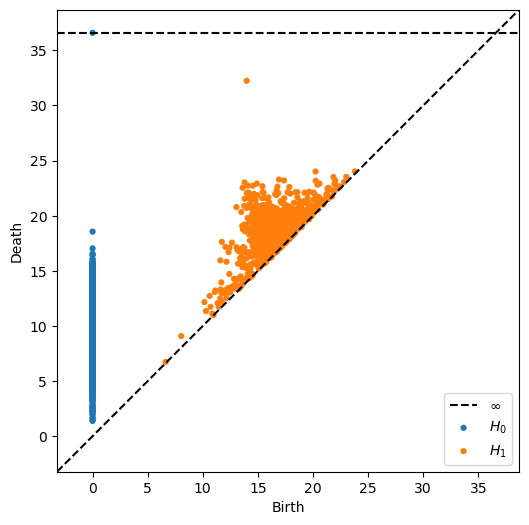

In [12]:
output = pipeline_rhom(image_function=p3, num_pixels=40, window_size=100, y_int=44, x_trans=6, n_isos=1000, x_translate=1000, y_translate=1000, maxdim=1, coeff=3)
plot_dgms(output)

still seeing homology corresponding to C6

## Square C1 lens

In [4]:
def F(x,y):
    ret = 0
    if 0< x % 1 < 0.1:
        ret = 1
    if 0.4 < y % 1 < 0.6 and 0 < x % 1 < 0.5:
        ret = 1
    if y % 1 > 0.8 and 0 < x % 1 < 0.5:
        ret = 1
    return ret

In [5]:
def get_unitsq_pixels(num_pixels, window_size):
    sample = list(np.linspace(0, window_size, num_pixels))
    pixels = []
    for i in range(len(sample)):
        for j in range(len(sample)):
            pixels.append((sample[i],sample[j]))     
    return pixels

    
    
def view_window_continuous_unitsq(image_function, num_pixels, window_size):
    
    pixels = get_unitsq_pixels(num_pixels, window_size)
            
    x_points = []
    y_points = []
    colors = []
    for i in range(len(pixels)):
        color = image_function(pixels[i][0],pixels[i][1]) 
        colors.append(color)
        x_points.append(pixels[i][0])
        y_points.append(pixels[i][1])
    
    fig = plt.figure(figsize = (4, 4))
    ax = plt.axes()
    ax.scatter(x_points, y_points, c = colors)
    plt.show()
    
    
def pipeline_unitsq(image_function, num_pixels, window_size, n_isos, x_translate, y_translate, maxdim, coeff):
    pixels = get_unitsq_pixels(num_pixels, window_size)
    isos_inv = generate_isom(n_isos, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output

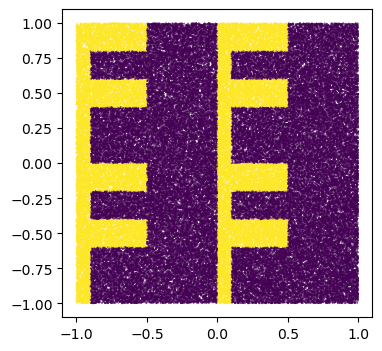

In [6]:
graph_continuous(image_function=F, x=1, y=1, x_random = True, n_samples= 100000, y_random = True)

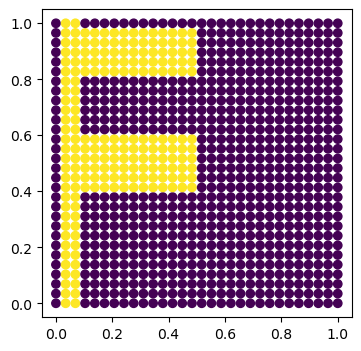

In [7]:
view_window_continuous_unitsq(image_function=F, num_pixels=30, window_size=1)

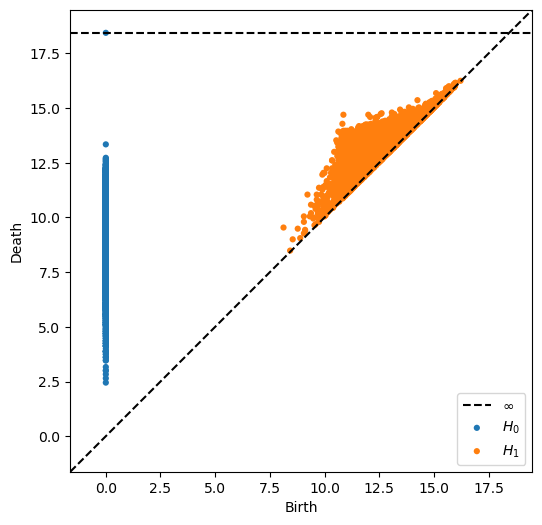

In [18]:
output = pipeline_unitsq(image_function=F, num_pixels=30, window_size=1, n_isos=5000, x_translate=10, y_translate=10, maxdim=1, coeff=2)
plot_dgms(output)

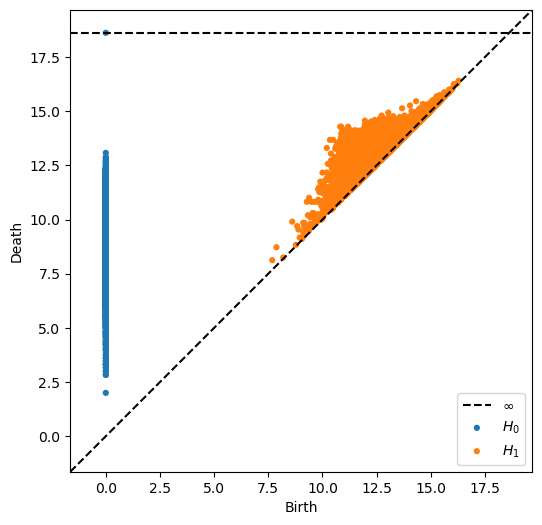

In [19]:
output = pipeline_unitsq(image_function=F, num_pixels=30, window_size=1, n_isos=5000, x_translate=10, y_translate=10, maxdim=1, coeff=3)
plot_dgms(output)

In [22]:
pixels = get_unitsq_pixels(num_pixels=30, window_size=1)
isos_inv = generate_isom(n_isos=10, x_translate=10, y_translate=10)

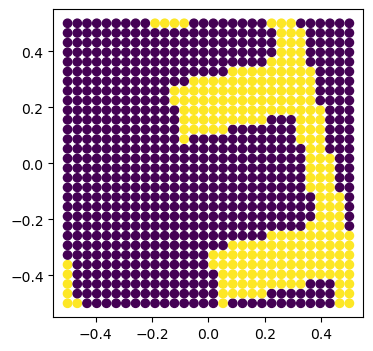

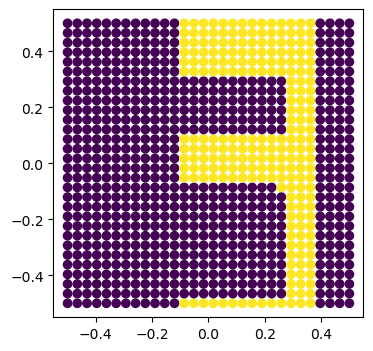

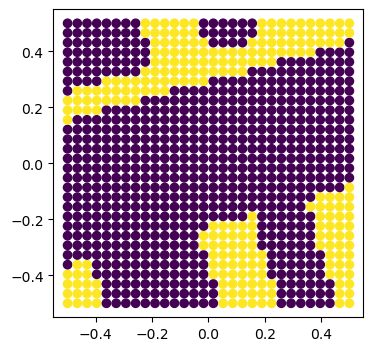

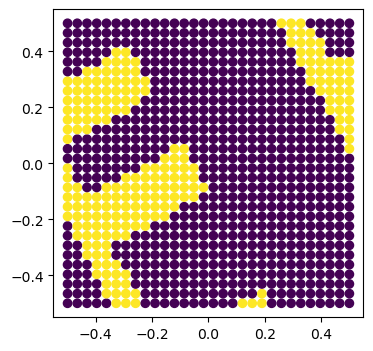

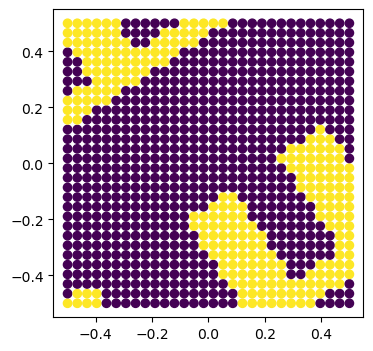

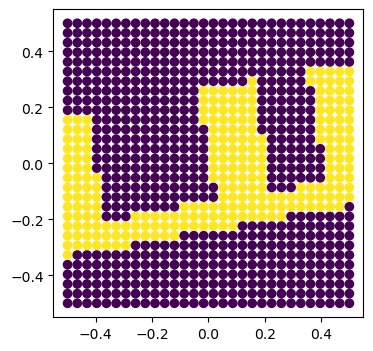

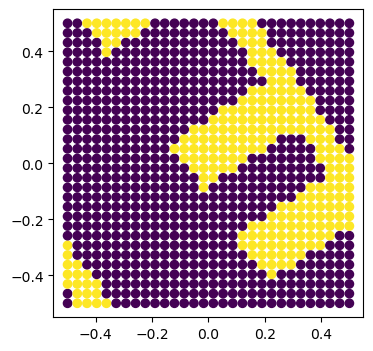

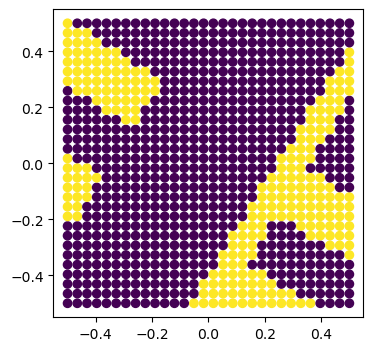

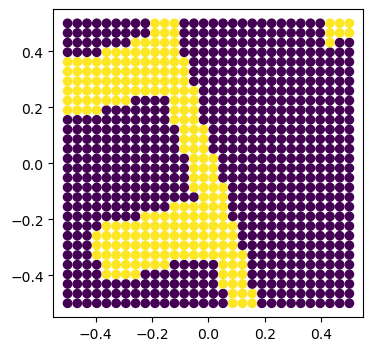

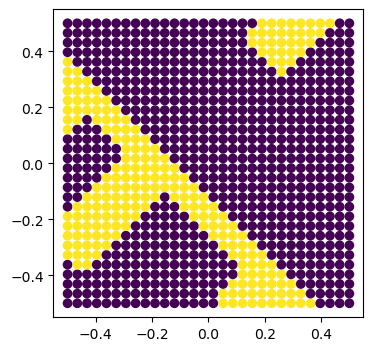

In [28]:
for i in range(10):
    view_isom2(isom_inv=isos_inv[i], image_function=F, num_pixels=30, window_size=1)

In [10]:
def generate_isom2(n_theta, n_translates, x_translate, y_translate):
    a = list(2 * x_translate * np.random.random(n_translates) - x_translate) # sampling from (-x,x)
    b = list(2 * y_translate * np.random.random(n_translates) - y_translate) # sampling from (-y,y)
    theta = ((np.linspace(0, 2*pi, n_theta - (6 * (n_theta//18))).tolist()))
    theta2 = n_theta // 18 * [0, pi / 3, 2 * pi / 3, pi, 4 * pi / 3, 5 * pi / 3]
    
    for i in range(len(theta2)):
        theta.append(theta2[i])

    isos = []
    isos_inv = []
    for i in range(n_theta):
        for j in range(n_translates):
            for k in range(n_translates):
                isos.append(isom(a[j], b[k], theta[i]))
                isos_inv.append(isom(-1 * a[j],-1 * b[k],2 * pi - theta[i])) 
    return isos_inv


def pipeline_unitsq2(image_function, num_pixels, window_size, n_theta, n_translates, x_translate, y_translate, maxdim, coeff):
    pixels = get_unitsq_pixels(num_pixels, window_size)
    isos_inv = generate_isom2(n_theta,n_translates, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output

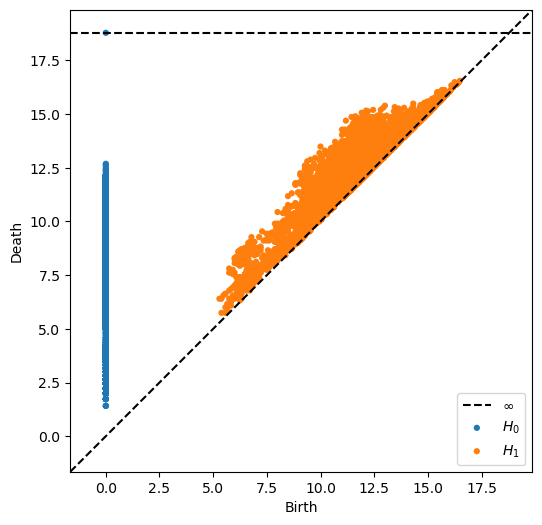

In [11]:
output = pipeline_unitsq2(image_function=F, num_pixels=30, window_size=1, n_translates = 10,n_theta = 50, x_translate=10, y_translate=10, maxdim=1, coeff=2)
plot_dgms(output)

In [24]:
def generate_isom3(n_theta, n_translates, x_translate, y_translate):
    a = list(np.zeros(n_translates//3))
    b = list(np.zeros(n_translates//3))
    a2 = list(np.linspace(-x_translate/2, x_translate/2, n_translates - n_translates//3)) # sampling from (-x,x)
    b2 = list(np.linspace(-y_translate/2, y_translate/2, n_translates - n_translates//3)) # sampling from (-y,y)
    
    for i in range(len(a2)):
        a.append(a2[i])
        b.append(b2[i])
    
    theta = ((np.linspace(0, 2*pi, n_theta - (6 * (n_theta//18))).tolist()))
    theta2 = n_theta // 18 * [0, pi / 3, 2 * pi / 3, pi, 4 * pi / 3, 5 * pi / 3]
    
    for i in range(len(theta2)):
        theta.append(theta2[i])

    isos = []
    isos_inv = []
    for i in range(n_theta):
        for j in range(n_translates):
            for k in range(n_translates):
                isos.append(isom(a[j], b[k], theta[i]))
                isos_inv.append(isom(-1 * a[j],-1 * b[k],2 * pi - theta[i])) 
    return isos_inv

def pipeline_unitsq3(image_function, num_pixels, window_size, n_theta, n_translates, x_translate, y_translate, maxdim, coeff):
    pixels = get_unitsq_pixels(num_pixels, window_size)
    isos_inv = generate_isom3(n_theta,n_translates, x_translate, y_translate)
    M = matrix_of_images(pixels, isos_inv, image_function)
    output = p_hom(M, maxdim, coeff)
    return output

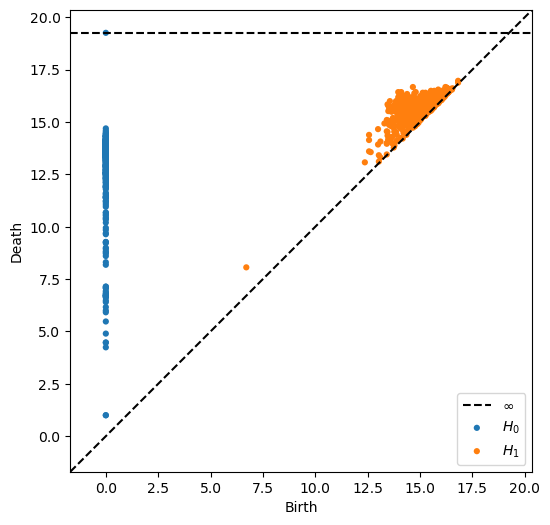

In [25]:
output = pipeline_unitsq3(image_function=F, num_pixels=30, window_size=1, n_translates = 10,n_theta = 50, x_translate=10, y_translate=10, maxdim=1, coeff=2)
plot_dgms(output)

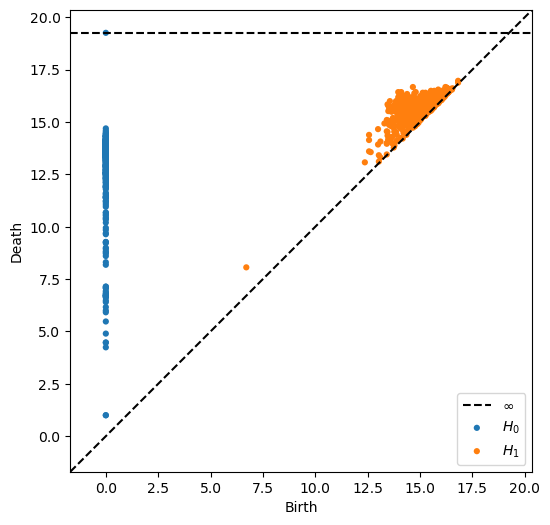

In [26]:
output = pipeline_unitsq3(image_function=F, num_pixels=30, window_size=1, n_translates = 10,n_theta = 50, x_translate=10, y_translate=10, maxdim=1, coeff=3)
plot_dgms(output)